## <center>Customer Segmentation Using K-Means Clustering </center>

In today's data-driven business landscape, understanding your customers is paramount for success. Companies, especially in the banking sector, are constantly seeking ways to optimize their marketing strategies and enhance customer engagement. One powerful tool in this pursuit is customer segmentation, and this portfolio project, delves into the fascinating world of data-driven customer segmentation.

The project draws its data from a real-world scenario involving a Portuguese banking institution's direct marketing campaigns. These campaigns were centered around phone calls, with the objective of determining whether clients would subscribe to a bank term deposit ('yes') or decline ('no').

Customer segmentation, a pivotal aspect of marketing analytics, involves dividing a customer base into distinct groups based on shared characteristics. These groups, or segments, can then be targeted with tailored marketing strategies, ultimately leading to more effective campaigns and enhanced customer relationships. The K-Means clustering algorithm, renowned for its simplicity and effectiveness, is employed in this project to uncover meaningful patterns within the data.

Throughout this project, we will explore the data, preprocess it for analysis, and apply the K-Means clustering algorithm to unearth customer segments. By the project's end, we aim to provide valuable insights that can inform marketing decisions, improve campaign targeting, and contribute to the overall success of the banking institution's marketing efforts. Through this exploration, we demonstrate the power of data analytics in optimizing marketing strategies, underlining its significance in today's data-centric business world.


#### Bank Client Data Variables

**1. age:** Age of the bank client (numeric)

**2. job:** Type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

**3. marital:** Marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

**4. education:** Education level (categorical: "unknown", "secondary", "primary", "tertiary")

**5. default:** Has credit in default? (binary: "yes", "no")

**6. balance:** Average yearly balance, in euros (numeric)

**7. housing:** Has housing loan? (binary: "yes", "no")

**8. loan:** Has personal loan? (binary: "yes", "no")

**9. contact:** Contact communication type (categorical: "unknown", "telephone", "cellular")

**10. day:** Last contact day of the month (numeric)

**11. month:** Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

**12. duration:** Last contact duration, in seconds (numeric)

**13. campaign:** Number of contacts performed during this campaign and for this client (numeric, includes last contact)

**14. pdays:** Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)

**15. previous:** Number of contacts performed before this campaign and for this client (numeric)

**16. poutcome:** Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

#### Output Variable

**17. y:** Has the client subscribed to a term deposit? (binary: "yes", "no")

## <center>STEP 1: Importing Libraries and Loading Data

In this section, we will set up the essential libraries required for data manipulation and visualization. Before delving into the dataset, it's important to ensure that we have the necessary tools in place.

The dataset used in this analysis can be accessed from The UCI Machine Learning Repository website. You can find it by following this link: UCI Machine Learning Repository - Bank Marketing Dataset.

In [585]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [586]:
df=pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## <center> STEP 2: Data Cleaning

With our dataset successfully loaded into a Pandas DataFrame, the next step involves thorough inspection and treatment to address any potential quality issues. In this analysis, our cleaning efforts will be directed towards the following aspects:

- **Missing Values:** Identifying and dealing with any instances of missing data to ensure the integrity of our analysis.
- **Duplicates:** Detecting and handling duplicate entries that might distort our findings
- **Outliers:** Detecting and addressing outliers that could impact the robustness of our conclusions.

By meticulously these aspects, we aim to create a reliable and trustworthy dataset that forms the foundation of our subsequent analysis and insights.

### Checking for Missing Values

To identify missing values within our dataset, we will utilize the `.isnull()` function from the Pandas library.


In [587]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From the output above, it's evident that our dataset does not contain any missing values, as illustrated in the heatmap below.


Text(0.5, 1.0, 'Missing Values')

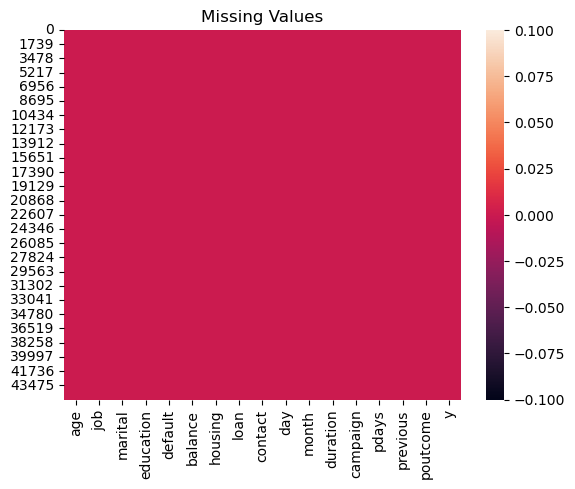

In [588]:
sns.heatmap(df.isnull()).set_title('Missing Values')

### Checking for duplicate entries

To identify potential duplicates within our dataset, we will employ the Pandas `.duplicated()` function.

In [589]:
df.duplicated().sum()

0

From the output above, it's apparent that our dataset does not contain any duplicate entries.


### Checking and Cleaning Outliers

Outliers are observations that significantly deviate from the majority of the data points. If not addressed, they can adversely impact the performance of our model. To identify the presence of outliers in our dataset, we will utilize box plots for visualization. If any outliers are detected, we will employ the Interquartile Range (IQR) technique to mitigate their effects.

Continuous variables in our dataset are;

- `age`
- `balance`
- `duration`


<Axes: >

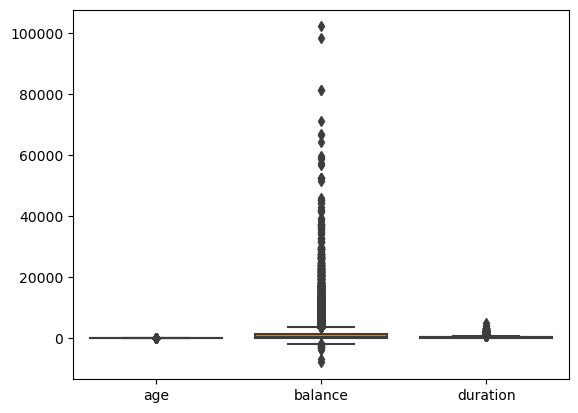

In [590]:
sns.boxplot(df[['age','balance','duration']])

From the box plot presented above, it's evident that some of our continuous variables exhibit outliers. However, given the variation in the scale of these variables, a single plot for all variables might not accurately portray the extent of the outliers. As a result, we will take the approach of creating separate box plots for each variable, both before and after the cleaning process, to better visualize the impact and effectiveness of outlier treatment.

<Axes: >

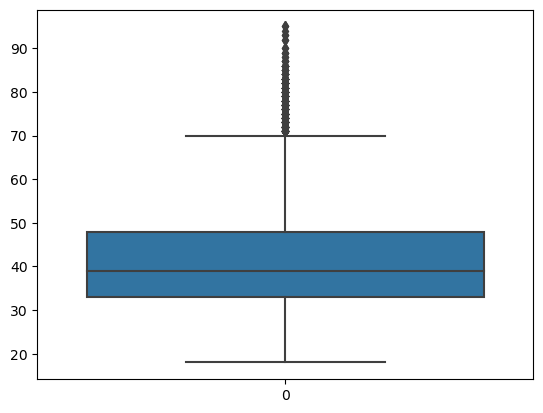

In [591]:
# age
sns.boxplot(df['age'])

We've noticed that the `age` variable contains outliers. To gain further insights, let's examine the statistical summary of this variable.


In [592]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

The statistical summary provided above reveals that the mean customer age is 40.93 years, accompanied by a standard deviation of 10.61 years. The age of the oldest customer is 95 years, while the youngest is 18 years. To ascertain whether these deviations constitute outliers, we will employ the Interquartile Range (IQR) technique.

The Interquartile Range (IQR) technique quantifies the spread of data within the middle 50% of observations. It calculates the range between the third quartile (Q3) and the first quartile (Q1). Any data point beyond 1.5 times the IQR below Q1 or above Q3 is considered an outlier. This method provides a robust measure for identifying outliers that might not be detected using traditional mean and standard deviation-based approaches.

We will create a function designed to accept a DataFrame and a column name as input, and its purpose will be to return the indices of outlier values using the following approach:


In [593]:
outlier_index=[]
def outlier_detector(data,column):
    q1=np.quantile(data[column],0.25)
    q3=np.quantile(data[column],0.75)
    iqr=q3-q1
    upper_limit=q3+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return data[(data[column]<lower_limit) |(data[column]>=upper_limit)]
# Calling this function will return a masked dataframe of all the outliers in our data. 

In [594]:
# Checking the statistical summary of outlier age values
outlier_age=outlier_detector(df,'age')
outlier_age['age'].describe()

count    487.000000
mean      76.815195
std        4.800842
min       71.000000
25%       73.000000
50%       76.000000
75%       80.000000
max       95.000000
Name: age, dtype: float64

Based on the provided statistical summary, the utilization of the IQR technique with a factor of 1.5 has resulted in the identification of 487 observations as outliers. This group of observations exhibits an average age of 76.8 years, accompanied by a standard deviation of 4.8. Notably, the youngest customer within this set is aged 71, while the oldest is 95 years.

Our next step involves the removal of these outlier values from our dataset. Subsequently, we will create another box plot to confirm that the `age` variable is now devoid of outliers.


<Axes: >

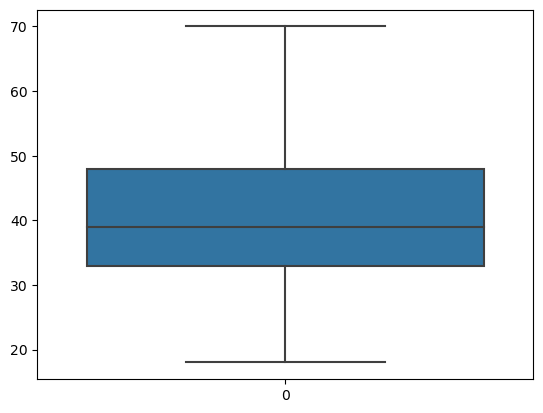

In [595]:
# dropping outliers from the DataFrame
df.drop(index=outlier_age.index,axis=0,inplace=True)
sns.boxplot(data=df['age'])

Having successfully eliminated outliers from the `age` column, we will proceed to apply the same sequence of steps to address outliers in the remaining numerical variables.


<Axes: >

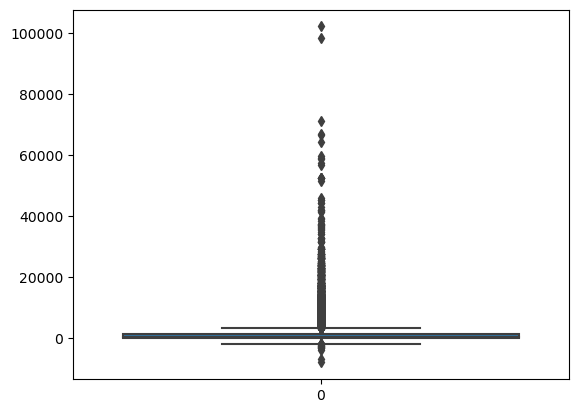

In [596]:
#Cleaning Balance column
sns.boxplot(data=df['balance'])


In [597]:
# Checking the statistical summary of outlier age values
outlier_balance=outlier_detector(df,'balance')
outlier_balance['balance'].describe()

count      4696.000000
mean       7436.895656
std        6114.679555
min       -8019.000000
25%        4262.000000
50%        5547.000000
75%        8183.750000
max      102127.000000
Name: balance, dtype: float64

<Axes: >

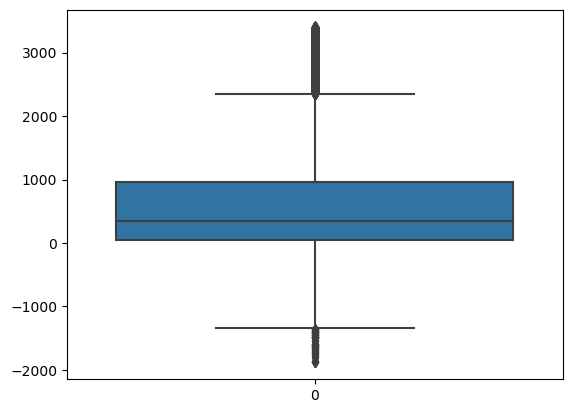

In [598]:
df.drop(index=outlier_balance.index,axis=0,inplace=True)
sns.boxplot(data=df['balance'])

<Axes: >

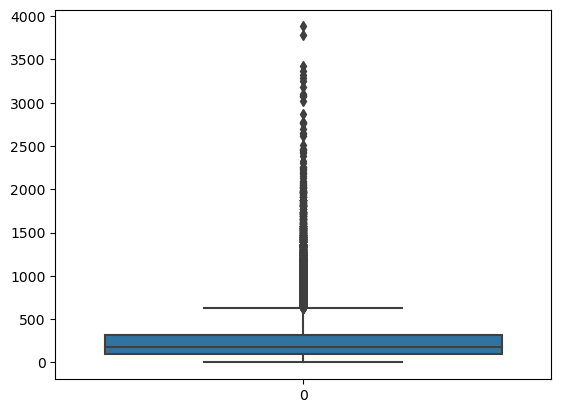

In [599]:
# Cleaning duration
sns.boxplot(df['duration'])

In [600]:
# Checking the statistical summary of outlier age values
outlier_duration=outlier_detector(df,'duration')
outlier_duration['duration'].describe()

count    2878.000000
mean      958.321751
std       357.191585
min       635.000000
25%       718.250000
50%       845.000000
75%      1080.750000
max      3881.000000
Name: duration, dtype: float64

<Axes: >

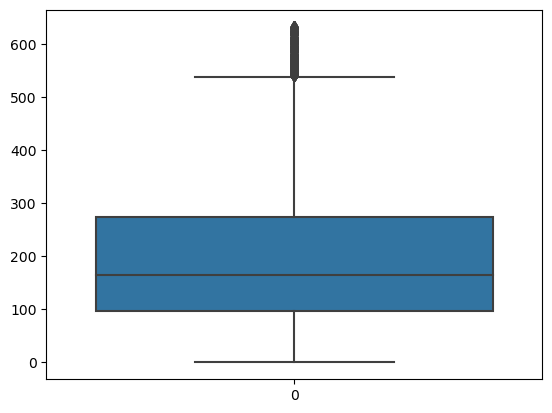

In [601]:
df.drop(index=outlier_duration.index,axis=0,inplace=True)
sns.boxplot(data=df['duration'])

**NOTE:** By setting the IQR factor to 1.5, we have effectively removed a substantial number of outlier observations from our dataset. It's important to acknowledge that if a more "strict" approach is required, decreasing the factor would result in narrower boundaries and the removal of even more outliers. However, this approach comes with a trade-off of potentially losing valuable data.

For the scope of this analysis, we will adhere to a factor of 1.5.


## <center>STEP 3: Exploratory Data Analysis and Visualization

With our dataset now cleaned and prepared, we are ready to embark on Exploratory Data Analysis (EDA) to gain insights into variable attributes and their interrelationships. Our EDA process will encompass the following analyses:

- **Univariate Analysis:** Examination of individual variables to understand their distributions, central tendencies, and spread.
- **Bivariate Analysis:** Exploration of relationships between pairs of variables to uncover potential associations and correlations.
- **Multivariate Analysis:** Investigation of interactions between multiple variables to reveal complex patterns and dependencies.

Through these analyses, we aim to extract valuable insights that will guide our subsequent modeling and decision-making processes.


### a. Univariate Analysis

#### i. Distribution of `age`

In [602]:
df['age'].describe()

count    37150.000000
mean        40.295855
std          9.882141
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

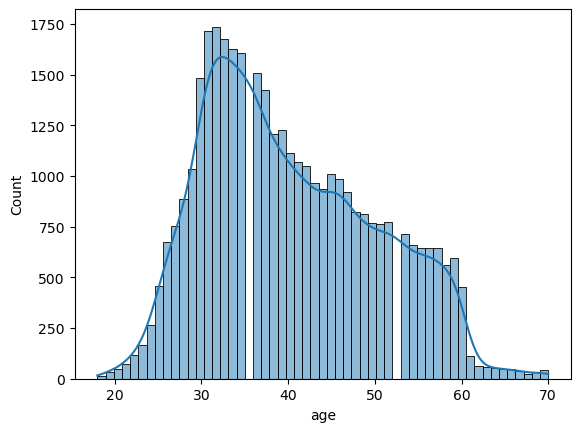

In [603]:
sns.histplot(df['age'],kde=True)

perfect this "The age of Bank customers is normally distributed around the mean of 40. 3 Years. however, we observe missing observations at about 36 years and 53 years. "

### ii. Distribution of `job` types among customers

In [604]:
jobs=df.groupby(by='job',as_index=False).count().sort_values(by='age',ascending=False)[['job','age']].rename(columns={'age':'count'})
jobs

,job,count
1,blue-collar,8248
4,management,7528
9,technician,6359
0,admin.,4438
7,services,3564
5,retired,1450
6,self-employed,1270
2,entrepreneur,1238
10,unemployed,1032
3,housemaid,1005


From the output above, it's evident that the majority of the bank's customers are employed in blue-collar jobs, comprising 8,248 individuals. The management category follows closely with 7,528 customers. Conversely, students and individuals with unknown job types are the least represented, with counts of 793 and 225 respectively. This distribution is visually represented below:

<Axes: xlabel='count', ylabel='job'>

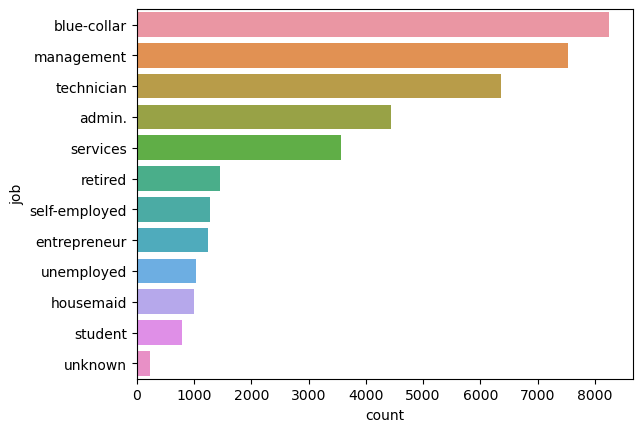

In [605]:
sns.barplot(data=jobs,x='count',y='job')

### iii. Distribution of bank `balance`  among customers

In [606]:
df['balance'].describe()

count    37150.000000
mean       624.536366
std        829.779671
min      -1884.000000
25%         42.000000
50%        338.000000
75%        954.750000
max       3413.000000
Name: balance, dtype: float64

Upon a preliminary review of the statistical summary for the account `balance`, it becomes apparent that certain accounts exhibit negative balances. For the context of this analysis, we will handle these negative balances as overdraft situations, aligning with the approach discussed in this article: [Handling Negative Bank Account Balances](https://www.creditkarma.com/money/i/negative-bank-account).

Let's plot the distribution of this variable to get a deeper insight. 


<Axes: xlabel='balance', ylabel='Count'>

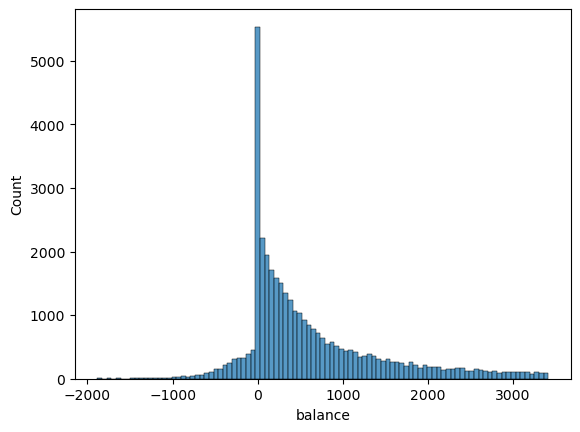

In [607]:
sns.histplot(df['balance'])

The histogram displayed above illustrates the distribution of the bank `balance`, which aligns closely with a normal distribution centered around a mean of $624.54. The standard deviation is calculated at $829.77. Notably, the distribution features a prominent spike at the value of $0, suggesting that a significant number of customers have a balance of $0 in their accounts.

### iv. Distribution of `duration`  from last time the customer was contacted (seconds)

In [608]:
df['duration'].describe()

count    37150.000000
mean       201.187725
std        138.732637
min          0.000000
25%         97.000000
50%        166.000000
75%        274.000000
max        634.000000
Name: duration, dtype: float64

The statistical summary provided above reveals that, on average, most customers were contacted after a duration of 201.19 seconds, with a standard deviation of 138.73 seconds. To gain a deeper understanding of the distribution of this variable, let's employ a histogram.

<Axes: xlabel='duration', ylabel='Count'>

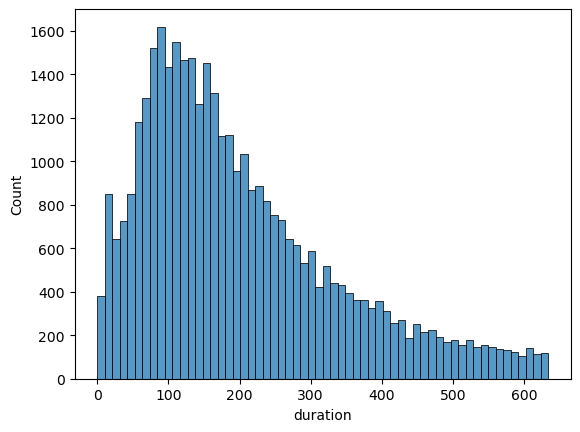

In [609]:
sns.histplot(df['duration'])

The histogram displayed above unveils that the variable `duration` adheres to a normal distribution, centered around a mean of 201.19 seconds. Notably, the distribution features a right tail, indicating the presence of longer call durations beyond the mean.

### b. Bivariate Analysis

### i. Distribution of `housing` loans among bank customers age.

<Axes: xlabel='age', ylabel='Count'>

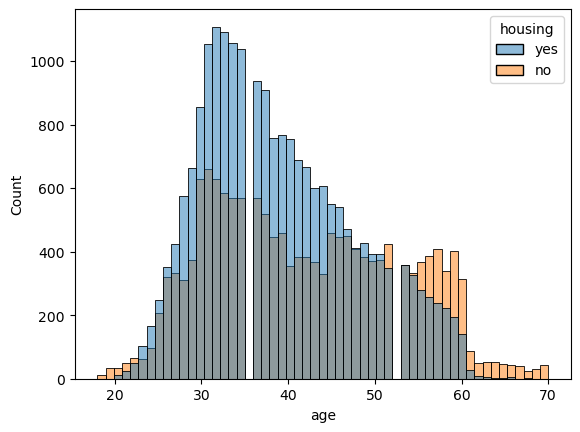

In [610]:
sns.histplot(data=df,x='age',hue='housing')

The histogram above highlights an intriguing pattern: there are no customers below the age of 20 who possess a `housing` loan. As age progresses beyond 57, the count of customers with a `housing` loan experiences a noticeable decline.

### ii. Distribution of `duration` according to customer `age`

<Axes: xlabel='age', ylabel='duration'>

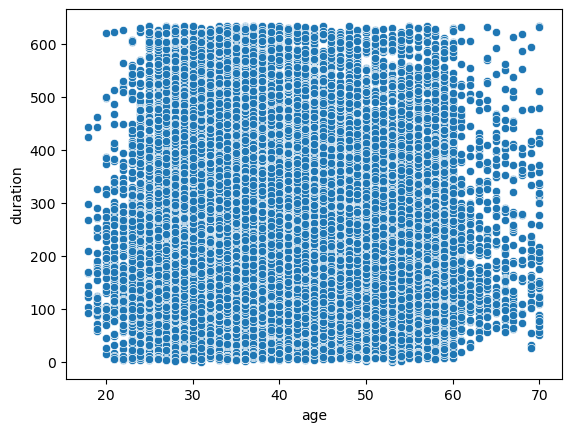

In [611]:
sns.scatterplot(data=df,x='age',y='duration')

The scatter plot depicted above, illustrating the relationship between `age` and `duration`, reveals a discernible trend. Specifically, we observe that fewer calls were conducted for customers under the age of 20 and those above 60 years.

### c. Multivariate Analysis

### i. Distribution of `duration` according to customer `age`

<Axes: xlabel='age', ylabel='balance'>

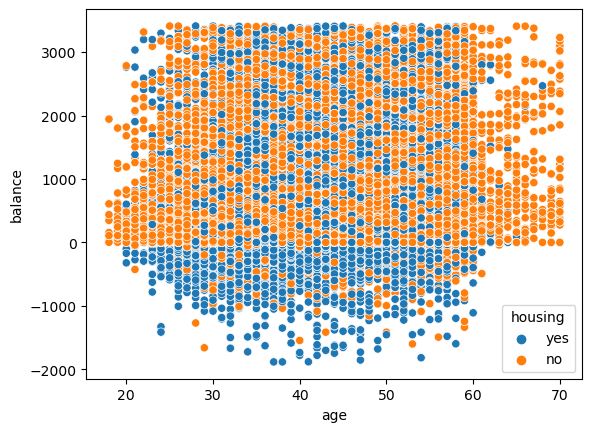

In [612]:
sns.scatterplot(data=df,x='age',y='balance',hue='housing')

The scatter plot displayed above provides valuable insights. Firstly, it indicates that the majority of bank customers who have an overdraft on their accounts also hold an existing `housing` loan. Secondly, it's noteworthy that most customers without housing loans tend to fall into two age groups: below the age of 25 and above the age of 60 years.


### ii. Distribution of `duration` according to customer `age`

<Axes: xlabel='age', ylabel='balance'>

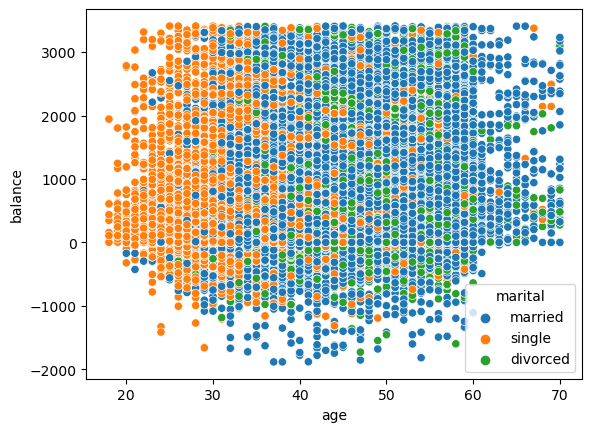

In [613]:
sns.scatterplot(data=df,x='age',y='balance',hue='marital')

The scatter plot depicted above offers insights into customer marital statuses and age distribution. It's evident that single customers are predominantly clustered below the age of 30 years. Conversely, married customers form a denser cluster between 30 and 65 years, with a few instances of divorced customers.


## <center>STEP 4: Modeling 

## Customer Segmentation using K-Means Clustering

In this section, we will leverage the K-means clustering model to partition customers into two distinct classes: those who subscribe to a bank term deposit ('yes') and those who decline ('no').

Since this is an unsupervised learning technique, we will exclude the `y` column from our analysis. However, we will use this column to assess the performance of our model.

We will initiate our analysis by constructing a baseline model utilizing all the available features.


### 1. Encoding Categorical Variables 

Encoding categorical variables is essential to enable us to utilize these variables as inputs in our model. The categorical variables that require encoding are as follows:

- `job`
- `marital`
- `education`
- `default`
- `housing`
- `loan`
- `contact`
- `month`
- `poutcome`
- `y`


In [614]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
df=pd.get_dummies(df,columns=categorical_variables,drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Upon encoding all the categorical variables, we observe that our baseline model encompasses 42 input variables.


In [615]:
# Our predictor Variables
x=df[df.columns[0:-1]]


In [616]:
# Building our model and obtaining predictions
from sklearn.cluster import KMeans
k_model=KMeans(n_clusters=2,n_init=15)
k_model.fit(x)
pred=k_model.predict(x)

In [617]:
# Evaluating the performance of our model
from sklearn.metrics import classification_report
report=classification_report(df['y_yes'],pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     34244
           1       0.11      0.31      0.16      2906

    accuracy                           0.75     37150
   macro avg       0.52      0.55      0.51     37150
weighted avg       0.87      0.75      0.80     37150



### Classification Report Interpretation

**Precision and Recall**: Precision indicates correct positive predictions among all positives, while recall represents true positive predictions among actual positives.

- For class 0 (won't buy): High precision (0.94) suggests accurate negative predictions. Recall (0.72) implies that some non-buyers are misclassified.

- For class 1 (will buy): Low precision (0.11) indicates many false positives. Recall (0.42) shows room to capture more buyers.

- F1-score balances precision and recall. Class 0: 0.81, Class 1: 0.18.

- Accuracy is 0.69, biased due to class imbalance.

### Business Context Interpretation:

In the business context, note the low precision and recall for classifying likely buyers. The model identifies some, but many false positives may misallocate resources.

Weighted F1-score (0.76) indicates moderate performance considering class imbalance. Improvements are needed for balanced classification.

### Suggestions for Improvement:

- Feature Engineering: Derive features for better differentiation.
- Advanced Models: Try Random Forest, Gradient Boosting, or Neural Networks.
- Class Imbalance: Use oversampling, undersampling, or synthetic data.
- Hyperparameter Tuning: Optimize model performance.
- Ensemble Methods: Combine predictions for robust results.
